# Linear Regression
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation y= m*x+c.
1) In this equation:
- y – Dependent Variable
- m – Slope
- x – Independent variable (coefficeint)
- c – Intercept

In [1]:
# Simple Liner Regression is characterized by one independent variable.

# Multilinear Regression is characterized by multiple (more than 1) independent variable.

In [2]:
# While finding the best fit line, you can fit a polynomial or curvilinear regression. 
# And these are known as polynomial or curvilinear regression.

In [3]:
# Simple Linear Regression
import pandas as pd

In [4]:
df = pd.DataFrame({'Place':[1,2,3,4,5,6],"Profit":[21,26,25,30,29,35]})
df

,Place,Profit
0,1,21
1,2,26
2,3,25
3,4,30
4,5,29
5,6,35


In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
ypre = model.fit(x,y)

In [7]:
ypre

LinearRegression()

In [8]:
model.coef_

array([2.4])

In [9]:
model.intercept_

19.266666666666666

In [10]:
ypre=model.predict(x)

In [11]:
ypre

array([21.66666667, 24.06666667, 26.46666667, 28.86666667, 31.26666667,
       33.66666667])

In [12]:
check = pd.DataFrame({'Place':df['Place'],'Actual Profit':df['Profit'],"Predicted Profit":ypre})
check

,Place,Actual Profit,Predicted Profit
0,1,21,21.666667
1,2,26,24.066667
2,3,25,26.466667
3,4,30,28.866667
4,5,29,31.266667
5,6,35,33.666667


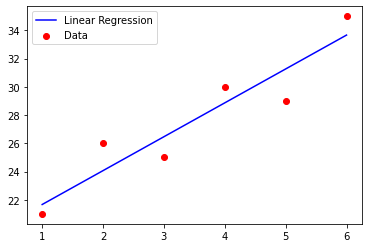

In [13]:
from matplotlib import pyplot as plt
plt.scatter(x,y,c='r')
plt.plot(x,ypre,c='b')

# Function add a legend  
plt.legend(["Linear Regression", "Data"], loc ="upper left")

In [14]:
# Analyze the performance of the model by calculating mean squared error and R2
import numpy as np
error = y - ypre
se = np.sum(error**2)
print('Squared Error: ', se)
n = np.size(x)
mse = se/n
print('Mean Squared Error: ', mse)

rmse = np.sqrt(mse)
print('Root Mean Square Error: ', rmse)
ymean = np.mean(y)
SSt = np.sum((y - ymean)**2)
R2 = 1- (se/SSt)
print('R2 Score: ', R2)


Squared Error:  14.533333333333326
Mean Squared Error:  2.422222222222221
Root Mean Square Error:  1.5563490039905
R2 Score:  0.8739884393063584


## Multi-Linear Regression

In [54]:
import pandas as pd

In [55]:
data = pd.read_csv('d:50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
data.shape

(50, 5)

In [57]:
# All the variables in the numeric form so it will change the catoragical data in numeric form.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
data['State']=le.fit_transform(data['State'])

In [59]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,2,64926.08
46,1315.46,115816.21,297114.46,1,49490.75
47,0.00,135426.92,0.00,0,42559.73
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


C:\Users\JP Computer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


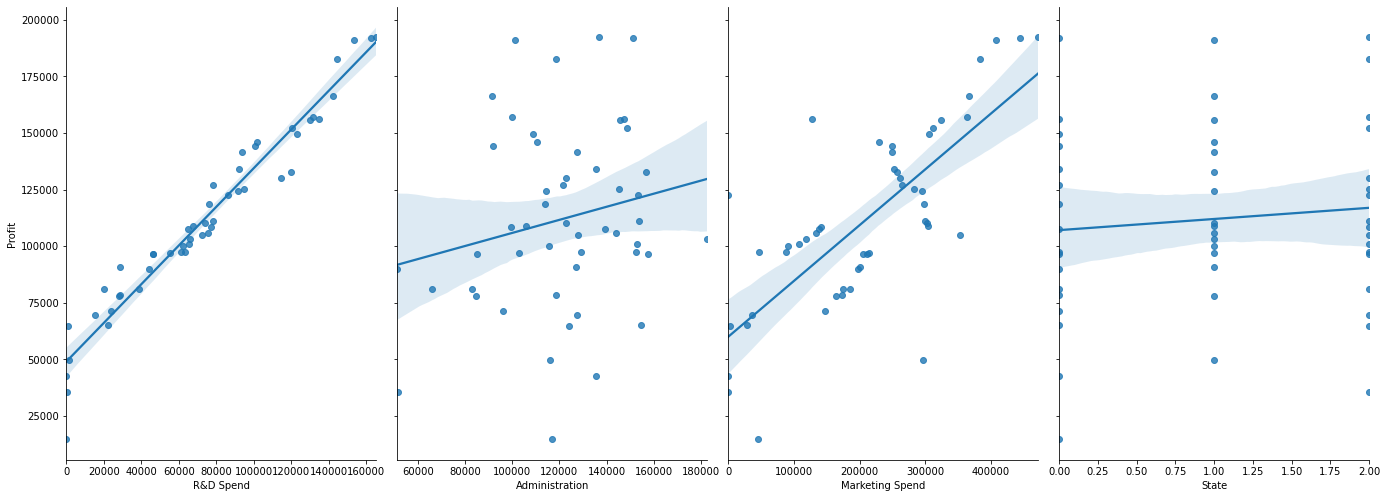

In [60]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,x_vars=['R&D Spend', 'Administration', 'Marketing Spend', 'State'], y_vars="Profit",
             size=7,aspect=0.7,kind='reg')

In [61]:
# divided data into independent and dependent variable.
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [62]:
# spliting the dataset into training set and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
# import the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [64]:
# fitting multi-regression in train test.
model.fit(x_train,y_train)

LinearRegression()

In [65]:
# preadcting the test set result
ypre = model.predict(x_test)

In [66]:
ypre

array([147755.52309185, 109179.67524759,  90449.93320336, 127031.59522356,
        73798.93147013, 113997.397411  ,  82434.88484326, 159861.50156689,
       117182.24589651,  72980.25739766])

In [67]:
# comparing predicted profit with actual profit.
check = pd.DataFrame({'actual':y_test,'predicted':ypre})
check

,actual,predicted
15,129917.04,147755.523092
23,108733.99,109179.675248
35,96479.51,90449.933203
13,134307.35,127031.595224
36,90708.19,73798.931470
22,110352.25,113997.397411
39,81005.76,82434.884843
6,156122.51,159861.501567
21,111313.02,117182.245897
40,78239.91,72980.257398


In [68]:
# find the MAE,MSE,RMSE,R2 Score,Adjusted R2 Score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE: ',mean_absolute_error(y_test,ypre))

print('MSE:',mean_squared_error(y_test,ypre))

print('RMSE:',np.sqrt(mean_squared_error(y_test,ypre)))

print('R2 Score:',r2_score(y_test,ypre))

MAE:  6844.090076237636
MSE: 78504685.58257733
RMSE: 8860.286992111336
R2 Score: 0.8578283427323671


![](lr1.jpg)

![](lr2.jpg)

![](lr3.jpg)

![](lr4.jpg)

![](lr5.jpg)

![](lr6.jpg)

![](pr1.jpg)

![](pr2.jpg)

![](pr3.jpg)

![](pr4.jpg)

![](s1.jpg)

![](s2.jpg)

![](s3.jpg)

![](rr1.jpg)

![](rr2.jpg)

![](rr3.jpg)

![](rr4.jpg)

![](rr5.jpg)

![](l1.jpg)

![](l2.jpg)

![](l3.jpg)

![](l5.jpg)

![](l6.jpg)

![](l7.jpg)

![](l8.jpg)

![](l9.jpg)

## By Nikhil Yadav